<a href="https://colab.research.google.com/github/brightxzh/movie_review/blob/main/3-1.Word2Vec_%EB%B6%88%ED%95%9C%EB%8B%B9_%EB%A6%AC%EB%B7%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec(gensim) 

- [참조:](https://www.nextobe.com/single-post/2017/06/28/%ED%95%9C%EA%B8%80-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%B0%8F-word2vec%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%9C%A0%EC%82%AC%EB%8F%84-%EB%B6%84%EC%84%9D)

## 환경 설정

In [ ]:
# gensim을 설치합니다. (Gensim은 Python 기반의 Text mining library이며, 토픽 모델링, word2vec도 지원합니다.)
!pip install -U gensim

     |████████████████████████████████| 24.2MB 126kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# NLTK를 설치합니다. (자연어 처리를 위해 광범위하게 쓰이는 Python library입니다.)
!pip install nltk

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 460kB 57.6MB/s 
     |████████████████████████████████| 92kB 11.1MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


### 프로세스

In [ ]:
# 구글 드라이브 연결을 위한 기본 세팅
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# 문서 ID로 실제 파일 불러오는 법
## https://drive.google.com/file/d/1an_t3H4xNdlziry9yDPofSEk6ksKdTdx/view?usp=sharing

rawdata_downloaded = drive.CreateFile({'id': '1an_t3H4xNdlziry9yDPofSEk6ksKdTdx'})
rawdata_downloaded.GetContentFile('moviere_불한당.csv')

In [ ]:
import pandas as pd

pd.set_option('max_colwidth',500)

# 파일을 DataFrame으로 전환
rawdata = pd.read_csv('moviere_불한당.csv', header=0,encoding='utf-8', dtype=str, engine='python')

In [ ]:
rawdata

,Unnamed: 0,nickname,text,score,like,dislike,time,watch_movie
0,0,박은영(fall****),영화 를 이렇게 세련되게 잘 만들어놓고. 임시완을 다시 보게 만들어놓고. 왜 감독은 저런 짓을 했을까 너무 안타깝고 아쉽다... 그래도 영화는 정말 재밌었음 배우들 생각해서라도 잘 됐음 좋겠다 ㅠㅠ,10,3068,396,2017-05-22 18:09:00,관람객
1,1,sj(aban****),"대선때문에 영화 홍보가 안되고 대선 미루라고 하며, 더킹과 마스터를 조무래기라고 리트윗하고, 데이트전에 홍어먹으라는 감독 영화네요",1,4547,1970,2017-05-18 17:23:00,0
2,2,미짱씨(skad****),불한당 기대했는데 감독때문에 안볼것입니다 감독이 전라도비하 여성비하를 리트윗했다죠?영화 폭망하길 기원합니다,1,4336,1760,2017-05-18 17:26:00,0
3,3,pumpkin EyE(lily****),감독만큼 수준 이하임. 이 감독 트윗한번 보고 나니. 왜 이따위인지 알겠음.,1,4557,2007,2017-05-18 17:25:00,0
4,4,앨리스(aeon****),감독 문제로 보이콧하기에는 너무 잘만든 영화. 간만에 보는 웰메이드 느와르.,10,2814,402,2017-05-22 19:06:00,관람객
...,...,...,...,...,...,...,...,...
12575,12575,핫포(csp7****),솔직히. 임시완이 연기는 잘하지만. 이영화의. 역활에는 좀 붕뜨지안나요? 어느정도 현실감이있어야. 영화에 몰입이돼는데. 영. 몰입이안돼네요. 이영화에서 임시완은 미스캐스팅입니다.,6,1,25,2018-04-26 14:45:00,0
12576,12576,히끗ㅜㅜ(wd86****),영화 속 캐릭터들 하나 하나가 어찌나 임팩트 있던지 완전 딱 내스탈!! 기회되면 한번 더 볼 생각!,10,2,26,2017-05-19 05:14:00,0
12577,12577,FormerAction(form****),감독도 문제이지만 오로지 팬덤많으로 관객수 90만찍는것도 참 한심,1,5,29,2017-06-07 00:25:00,0
12578,12578,kyun****,볼만한영화추천합니다,10,12,36,2017-05-19 12:43:00,관람객


In [ ]:
rawtext = pd.DataFrame(rawdata['text'])

In [ ]:
rawtext

,text
0,"원작을 뛰어넘는 작품은 없다지만 굳이 끼워넣은 인위적인 설정과 무미건조한 주인공의 표정, 고증없이 나열된 영화 속 동양의 세계에 실망스러웠습니다. 심지어 영화를 관통하는 큰 가치가 악역 보리 칸에게도 존재해 이 사..."
1,킬링타임용 영상미는 좋으나 스토리등 유치하고 별로 원작보다노잼임
2,일단... 디지스타일의 애니메이션은 노래와 시대적 센스를 반영해서 재구성한 작품으로 호불호가 갈림에도 역시 디즈니!! 답다라는 평을 주는데... 이건.. 그냥 진지한 중국 무협영화를 영어로 보는 느낌? 스토리야 디즈...
3,이걸 한번 볼바엔 반도를 10번 보겠습니다
4,별 로 재 미 없 습 니 다 ; ; ;
...,...
4515,왜 네이버 ㅅㅐㄲㅣ는 네티즌 평점 없애놨지?
4516,"중화사상범벅, 노래빼면 평점0점"
4517,여러분의 시간과 돈은 소중합니다차라리 이돈과 시간으로 리얼이나 염력을다시보기하세요
4518,이게 디즈니 뮬란을 실사화한거라고? ㅋㅋ 그냥 영어쓰는 중국식 무협영화. 노력으로 성장하던 뮬란은 어디가고 태생이 무림고수...


In [ ]:
rawtext.dropna(axis=0)

,text
0,영화 를 이렇게 세련되게 잘 만들어놓고. 임시완을 다시 보게 만들어놓고. 왜 감독은 저런 짓을 했을까 너무 안타깝고 아쉽다... 그래도 영화는 정말 재밌었음 배우들 생각해서라도 잘 됐음 좋겠다 ㅠㅠ
1,"대선때문에 영화 홍보가 안되고 대선 미루라고 하며, 더킹과 마스터를 조무래기라고 리트윗하고, 데이트전에 홍어먹으라는 감독 영화네요"
2,불한당 기대했는데 감독때문에 안볼것입니다 감독이 전라도비하 여성비하를 리트윗했다죠?영화 폭망하길 기원합니다
3,감독만큼 수준 이하임. 이 감독 트윗한번 보고 나니. 왜 이따위인지 알겠음.
4,감독 문제로 보이콧하기에는 너무 잘만든 영화. 간만에 보는 웰메이드 느와르.
...,...
12575,솔직히. 임시완이 연기는 잘하지만. 이영화의. 역활에는 좀 붕뜨지안나요? 어느정도 현실감이있어야. 영화에 몰입이돼는데. 영. 몰입이안돼네요. 이영화에서 임시완은 미스캐스팅입니다.
12576,영화 속 캐릭터들 하나 하나가 어찌나 임팩트 있던지 완전 딱 내스탈!! 기회되면 한번 더 볼 생각!
12577,감독도 문제이지만 오로지 팬덤많으로 관객수 90만찍는것도 참 한심
12578,볼만한영화추천합니다


In [ ]:
## 공백값(NAN) 제거
rawtext = rawtext.dropna(axis=0)

In [ ]:
import time
start_vect=time.time()

from konlpy.tag import Okt
from konlpy.utils import pprint
okt = Okt()

pos = lambda d: [''.join(p) for p in okt.nouns(d)]
texts_ko = [pos(result) for result in rawtext['text']]

print("training Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

training Runtime: 0.64 Minutes


In [ ]:
texts_ko

[['영화', '를', '임시완', '다시', '왜', '감독', '저런', '짓', '영화', '정말', '배우', '생각'],
 ['대선',
  '때문',
  '영화',
  '홍보',
  '대선',
  '더킹',
  '마스터',
  '조무래기',
  '리트윗',
  '데이트',
  '전',
  '홍어',
  '감독',
  '영화'],
 ['불한당', '감독', '때문', '감독', '전라도', '성비', '리트윗', '영화', '폭', '기원'],
 ['감독', '수준', '이하임', '이', '감독', '트윗', '한번', '보고', '나니', '왜', '인지'],
 ['감독', '문제', '보이콧', '잘만', '영화', '간만', '웰', '메이드', '느와르'],
 ['트위터', '감독', '정신', '좀'],
 ['감독', '사상', '사람', '작품', '절대'],
 ['임시완', '연기', '연기', '간만', '설경구'],
 ['홍어', '드립', '전라도', '궁둥이', '여자', '성격', '여자', '성희롱', '뭘', '영화', '감독', '불한당'],
 ['감독', '트윗'],
 ['상', '전라도', '감독', '수준', '알', '영화', '용도', '별로', '돈', '시간', '최악'],
 ['제법', '요', '보이콧', '때문', '흥행', '좀', '평가', '영화', '것'],
 ['감독'],
 ['감독', '수준', '알', '그', '영화', '그', '감독', '요'],
 ['감독', '때문', '영화'],
 ['꿀잼', '영환', '데'],
 ['구글',
  '삭제',
  '감독',
  '를',
  '봣는데',
  '오해',
  '살',
  '글',
  '홍어',
  '홍어',
  '거리',
  '게',
  '정상',
  '안보',
  '여요'],
 ['정말',
  '만',
  '제대로',
  '영화',
  '임시완',
  '연기',
  '변신',
  '설경구',
  '다시',
  '전성기',
  '시절',
  

In [ ]:
start_vect=time.time()

# training 모델 훈련

from gensim.models import word2vec
wv_model_ko = word2vec.Word2Vec(texts_ko, size=1000, window=10, min_count=0, iter=10, sg=1)
## size=차원의 숫자(올라갈수록 상세히 하지만 느림) 100
## window=주변을 보는 범위(앞뒤 5) 
## min_count=최소 출현 빈도 100
## workers=사용하는 CPU 코어 숫자
## iter = 반복횟수 10
## sg= CBOW=0 / Skip-Gram=1

#from gensim.models import FastText
#wv_model_ko = FastText(texts_ko, size=1000, window=10, min_count=0, iter=10, sg=1)


wv_model_ko.init_sims(replace=True)
wv_model_ko.save('ko_word2vec_e.model')

print("training Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

training Runtime: 0.19 Minutes


In [ ]:
## 입력 단어 확인용
from gensim.models import word2vec
model = word2vec.Word2Vec.load('ko_word2vec_e.model')

## 총 단어 숫자
len(model.wv.vocab.keys())

6997

In [ ]:
## 전체 단어 리스트
list(model.wv.index2word)

['영화',
 '감독',
 '연기',
 '임시완',
 '배우',
 '설경구',
 '진짜',
 '점',
 '사람',
 '느와르',
 '평점',
 '생각',
 '정말',
 '보고',
 '이',
 '것',
 '연출',
 '스토리',
 '볼',
 '왜',
 '때문',
 '말',
 '불한당',
 '신세계',
 '최고',
 '더',
 '그냥',
 '수준',
 '연기력',
 '작품',
 '좀',
 '그',
 '자체',
 '수',
 '하나',
 '임',
 '재미',
 '정도',
 '내용',
 '돈',
 '시간',
 '거',
 '뭐',
 '느낌',
 '평가',
 '안',
 '인생',
 '듯',
 '내',
 '쓰레기',
 '감',
 '반전',
 '인성',
 '한국',
 '홍어',
 '여운',
 '만',
 '또',
 '테러',
 '별로',
 '일베',
 '장면',
 '함',
 '놈',
 '액션',
 '사랑',
 '트위터',
 '나',
 '번',
 '때',
 '프리',
 '즌',
 '트윗',
 '중',
 '기대',
 '한번',
 '다시',
 '캐릭터',
 '걸',
 '역시',
 '보지',
 '한국영',
 '처음',
 '개',
 '몰입',
 '정신',
 '끝',
 '저',
 '마지막',
 '알',
 '이제',
 '보기',
 '다른',
 '정선',
 '욕',
 '이상',
 '결말',
 '못',
 '대박',
 '노잼',
 '감정',
 '완전',
 '프리즌',
 '꼭',
 '전라도',
 '흥행',
 '움',
 '게',
 '점도',
 '추천',
 '최악',
 '앞',
 '현수',
 '칸',
 '세상',
 '영화로',
 '잘만',
 '요',
 '제대로',
 '전개',
 '전',
 '두',
 '변',
 '김희원',
 '줄',
 '난',
 '문제',
 '이건',
 '재호',
 '매력',
 '속',
 '도',
 '개인',
 '이야기',
 '브로맨스',
 '모두',
 '상황',
 '별',
 '평',
 '간만',
 '아주',
 '기',
 '이유',
 '멜로',
 '잼',
 '뭔가',
 '발언',
 '

In [ ]:
# test 결과보기
print(wv_model_ko.most_similar(pos('기생충'), topn=50))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


KeyError: ignored

In [ ]:
# test 결과보기
print(wv_model_ko.most_similar(pos('박찬욱'), topn=50))

[('작', 0.9674420356750488), ('살인의추억', 0.9617370963096619), ('이자', 0.9582974910736084), ('마스터피스', 0.9569458961486816), ('감사', 0.9563540816307068), ('퀄리티', 0.95586097240448), ('마더', 0.9490038156509399), ('옥자', 0.9469808340072632), ('매번', 0.9445124864578247), ('이제', 0.9443850517272949), ('걸작', 0.9412665963172913), ('메이드', 0.9408504366874695), ('대중성', 0.9395298361778259), ('전작', 0.939502477645874), ('화의', 0.9385452270507812), ('웰', 0.9384967088699341), ('이슈', 0.935400128364563), ('관심', 0.9335483312606812), ('조합', 0.9335225820541382), ('대작', 0.9319749474525452), ('명성', 0.9310036897659302), ('개그', 0.9307863712310791), ('스타일', 0.9306840896606445), ('할리우드', 0.9300297498703003), ('역시', 0.9280967116355896), ('한계', 0.9266097545623779), ('획', 0.9261237978935242), ('찬사', 0.9249261617660522), ('최고다', 0.9242517948150635), ('독립영화', 0.9241885542869568), ('화중', 0.9230214357376099), ('영화사', 0.9229180812835693), ('코드', 0.922746479511261), ('그간', 0.9226624965667725), ('상상력', 0.9224860668182373), ('루', 0.92

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [ ]:
print(wv_model_ko.most_similar(positive=[u'현실'], negative=[u'꿈'], topn=50))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: ignored

In [ ]:
print(wv_model_ko.most_similar(positive=[u'현실', '사회'], negative=[u'꿈'], topn=50))

[('연성', 0.9991353154182434), ('예상', 0.998912513256073), ('진행', 0.9988305568695068), ('시아', 0.9987370371818542), ('꽤', 0.9987303018569946), ('개판', 0.9986964464187622), ('삭제', 0.9986058473587036), ('흐름', 0.9984478950500488), ('신', 0.99840247631073), ('그것', 0.9983862042427063), ('약간', 0.9983434677124023), ('반전', 0.9982970952987671), ('중국어', 0.9982268810272217), ('색감', 0.9981217384338379), ('짜임새', 0.9980183839797974), ('그닥', 0.9979659914970398), ('로써', 0.9979104399681091), ('리플렉션', 0.9978657960891724), ('스타일', 0.997847318649292), ('샹', 0.9978453516960144), ('신도', 0.9978220462799072), ('구리', 0.9977177977561951), ('또한', 0.9977006316184998), ('반', 0.997698187828064), ('굿', 0.9975742697715759), ('성', 0.9975079894065857), ('수현', 0.9974716901779175), ('어디', 0.9974618554115295), ('갈수록', 0.9974035620689392), ('퀄리티', 0.9974015355110168), ('주요', 0.9974002242088318), ('집중', 0.9972320795059204), ('읭', 0.9972055554389954), ('부족', 0.9971867799758911), ('여', 0.9970797300338745), ('쫌', 0.9970330595970154)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(wv_model_ko.most_similar(positive=[u'현실', '사회'], negative=[u'꿈', '빈부격차'], topn=50))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: ignored

## 시각화

### http://projector.tensorflow.org/


### Publish 용 링크
http://projector.tensorflow.org/?config=https://gist.githubusercontent.com/ddokbaro/1d57b83de08d791e2905e9726fe1c215/raw/a6178fe978bdacd12d81da49d92eecb40e4b572a/test.json


### Publish 참조 페이지
https://medium.com/@aakashchotrani/visualizing-your-own-word-embeddings-using-tensorflow-688b3a7750ee


### 전체Top1000

In [ ]:
# your current directory 
!pwd

## 한국어:     !wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"
## 번자체한자: !wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSerifCJKtc-hinted.zip"

!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"

# remove files in zip file if they exist
!rm LICENSE_OFL.txt README *.otf 

# unzip downloaded files
## 한국어: !unzip NotoSansCJKkr-hinted.zip
## 번체자한자: !unzip NotoSerifCJKtc-hinted.zip

!unzip NotoSansCJKkr-hinted.zip

# move font files to 'fonts/truetype' directory
## 한국어: !mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/
## 번체자한자: !mv NotoSerifCJKtc-Medium.otf /usr/share/fonts/truetype/

!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

/content
--2020-11-15 13:11:41--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 64.233.188.128, 2404:6800:4008:c06::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M  45.2MB/s    in 2.6s    

2020-11-15 13:11:44 (45.2 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

rm: cannot remove 'LICENSE_OFL.txt': No such file or directory
rm: cannot remove 'README': No such file or directory
rm: cannot remove '*.otf': No such file or directory
Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: N

In [ ]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'ko_word2vec_e.model'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:300,:])
# X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


6997
[ 0.00011619 -0.03538563  0.00307714 -0.03363053 -0.01665381  0.00558708
 -0.02125728  0.00209724 -0.00018727 -0.00434444]


In [ ]:
df = pd.DataFrame(X_tsne, index=vocab[:300], columns=['x', 'y'])
df.shape

(300, 2)

In [ ]:
df.head(10)

,x,y
영화,1.788602,-4.529945
를,-4.035694,8.575801
임시완,3.533203,8.212845
다시,9.108871,0.055737
왜,-14.100216,-4.997966
감독,-15.147627,-7.365325
저런,-4.280936,-4.976852
짓,-4.325549,-7.926943
정말,5.395207,0.566658
배우,7.482115,8.733073


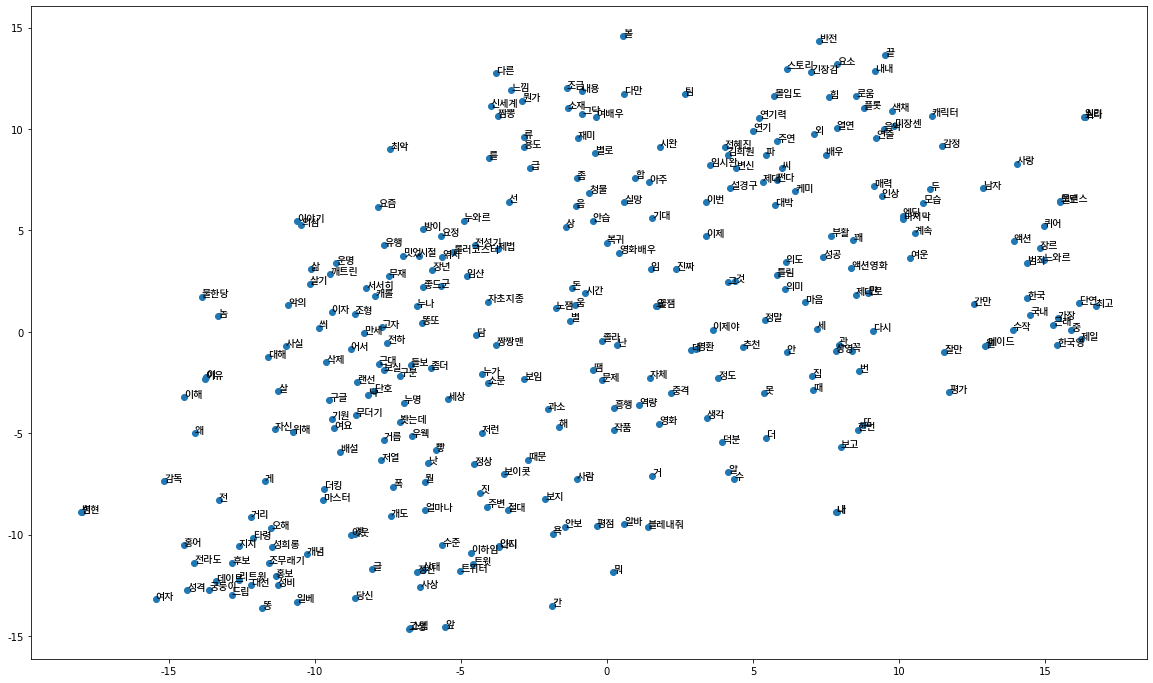

In [ ]:
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf'
fontprop = fm.FontProperties(fname=path, size=10)

fig = plt.figure()
fig.set_size_inches(20, 12)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontproperties=fontprop)
plt.show()

### 전체 시각화

In [ ]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'ko_word2vec_e.model'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
tsne = TSNE(n_components=3)

In [ ]:
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=3, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [ ]:
import time
start_vect=time.time()

X_tsne = tsne.fit_transform(X)
# X_tsne = tsne.fit_transform(X)

print("training Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

training Runtime: 6.55 Minutes


In [ ]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y','z'])
df.shape

(6997, 3)

In [ ]:
df

,x,y,z
영화,-8.331656,11.417649,-2.776616
를,-12.439364,-5.455439,-5.873330
임시완,-10.906258,4.357026,-13.674637
다시,-4.210145,9.959888,-11.524484
왜,-6.621023,16.120840,1.607389
...,...,...,...
볼놈,1.256090,12.818606,10.009347
다대,-6.409871,-1.742821,9.507945
절반,0.857862,-9.248631,1.760024
코너,10.020201,-0.839325,12.700205


In [ ]:
df.to_csv('dimension.tsv', sep="\t", index=False, header=None, encoding='utf-8')

In [ ]:
df['words'] = df.index
words = df['words']
words.to_csv('words.tsv', sep="\t", index=False, header=None, encoding='utf-8')